In [1]:
#IMPORT NECESSARY PACKAGES
import pandas as pd
from datetime import datetime
import CO2_functions
from CO2_functions import *

In [2]:
import importlib
importlib.reload(CO2_functions)
from CO2_functions import *

In [3]:
import pickle

# with open('data.pickle', 'wb') as handle:
#     pickle.dump(data2, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('data.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [2]:
# date1,date2 = get_date_range()
# data = get_sql_data("Aug2019_LI_8100_Vent",\
#               "Aug2019_Multiplexer","Aug2019_Vent_Anem_Temp",\
#               "Aug2019_Picarro",date1,date2,'all','split')
# data1 = drift_correct(data)
# data2 = remove_spikes(pd.read_pickle('Spike_ETs.pkl'),data1)

Enter Start Date YYYY-mm-DD:  2019-08-29
Enter End Date YYYY-mm-DD:  2019-08-29


Retrieving LI_vent data
Retrieving Multiplexer data
Retrieving Vent_Anem_Temp data
Retrieving Picarro data


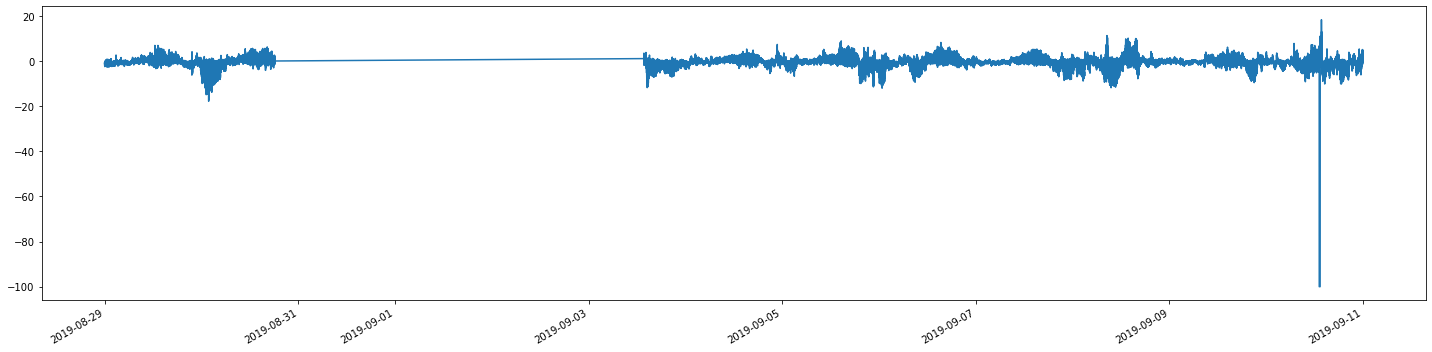

Is this an acceptable range?  2019-09-05 00:00:00
Input Start DateTime as YYYY-mm-DD HH:MM:SS -  2019-09-05 00:00:00
Input End DateTime as YYYY-mm-DD HH:MM:SS -  2019-09-06 00:00:00


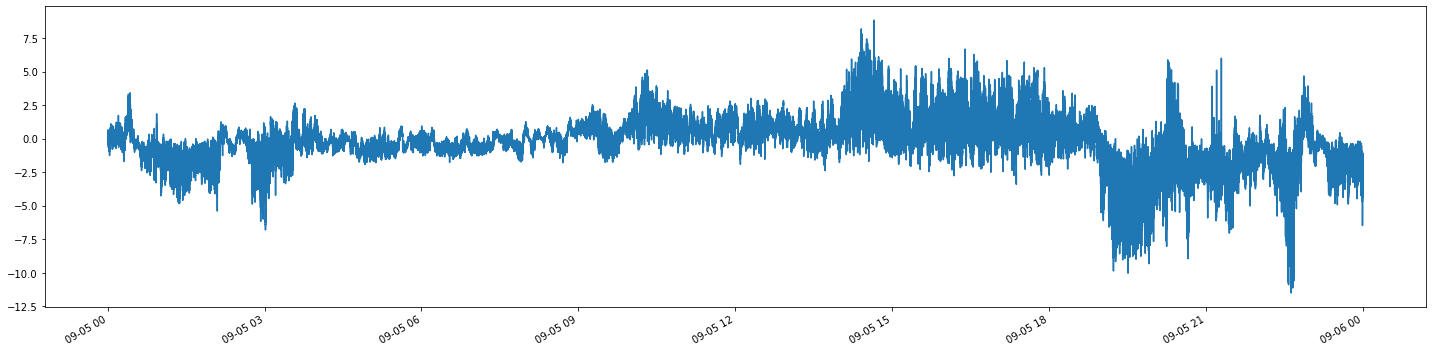

Is this an acceptable range?  y


In [7]:
x = plot_refinement_all([[data['Picarro_ANEM'],'Corrected_DT','ANEM_X']])

In [12]:
wind = wind_add(x[0],1)

C:\Users\agmey\Google Drive\Documents\McPherson\CO2_UnionRoof_Meyer\Code\CO2_Eddy\CO2_functions.py:989: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wd'] = df.apply(lambda row: wind_dir(row['ANEM_X'],row['ANEM_Y'],row['Loc']),axis=1)
C:\Users\agmey\Google Drive\Documents\McPherson\CO2_UnionRoof_Meyer\Code\CO2_Eddy\CO2_functions.py:990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ws'] = df.apply(lambda row : np.sqrt(row['ANEM_X']**2+row['ANEM_Y']**2),axis=1)


In [19]:
wind['rolling_x'] = wind['ANEM_X'].rolling(1000,center=True).mean()
wind['rolling_y'] = wind['ANEM_Y'].rolling(10,center=True).mean()
wind['rolling_z'] = wind['ANEM_Z'].rolling(10,center=True).mean()

C:\Users\agmey\Anaconda3\envs\CO2_Eddy\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\agmey\Anaconda3\envs\CO2_Eddy\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\agmey\Anaconda3\envs\CO2_Eddy\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

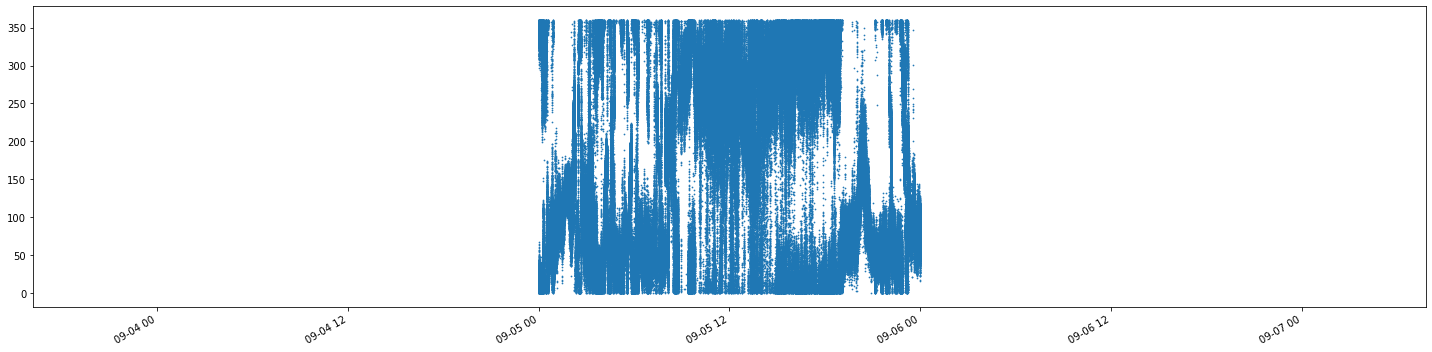

In [21]:
plot_vertical_stack([[wind,'Corrected_DT','wd']])

In [13]:
x['std'] = x['CO2'].rolling(1000,center=True).std()
x['mean'] = x['CO2'].rolling(1000,center=True).mean()
x['baseline'] = x.apply(lambda row: row['mean']+(-2.326)*row['std'],axis=1)
x['baseline2']= x['baseline'].rolling(1000,center=True).mean()

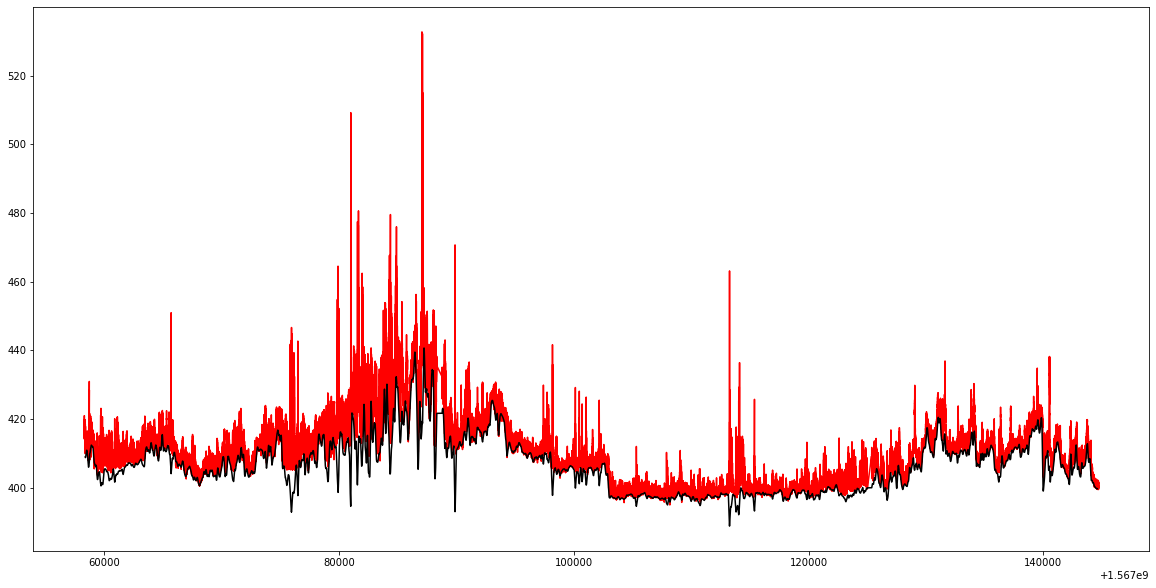

In [15]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(x['Corrected_ET'],x['CO2'],color = 'red')
ax.plot(x['Corrected_ET'],x['baseline2'],color='black')